 ## CLASSIFICAÇÃO BINARIA PREDIÇÃO DE DOENÇA DO CORAÇÃO
 
 PROFESSOR TIAGO OTTA

 RUBENS SANT ANNA JUNIOR

### INTRODUÇÃO


Trabalho referente a Semana 9 - General introduction to ML + Supervised Learning - Classification (I)
Professor Tiago Otto

### CARREGA BIBLIOTECAS

In [10]:
# Para manipulacao dos dados
import pandas as pd
import numpy as np

# para graficos
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv # !pip install sweetviz

# para modelagem
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid, KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


#### Settings ###########
pd.set_option("max_colwidth", 1000)
pd.get_option('display.precision')
pd.set_option('display.precision', 2)
pd.options.display.float_format = "{:,.2f}".format
plt.style.use("classic")

### ANÁLISE EXPLORATÓRIA

In [179]:
# carrega dataset
df = pd.read_csv("heart_disease_data.csv")  # sep = ';', decimal = ','


In [180]:
df["HeartDisease_Target"] = np.where(df["HeartDisease"] == "No",0 ,1 )
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_FamilyHistory,State,HeartDisease_Target
0,No,16.60,Yes,No,No,3.00,30.00,No,Female,55-59,...,Yes,Yes,Very good,5.00,Yes,No,Yes,No,MT,0
1,No,20.34,No,NaN,Yes,0.00,0.00,No,Female,80 or older,...,No,Yes,Very good,7.00,No,No,No,NaN,VT,0
2,No,26.58,Yes,NaN,No,20.00,30.00,No,Male,65-69,...,Yes,Yes,Fair,8.00,Yes,No,No,NaN,WY,0
3,No,24.21,No,NaN,No,0.00,0.00,No,Female,75-79,...,No,No,Good,6.00,No,No,Yes,No,VT,0
4,No,23.71,No,No,No,28.00,0.00,Yes,Female,40-44,...,No,Yes,Very good,8.00,No,No,No,NaN,DC,0
5,Yes,28.87,Yes,No,No,6.00,0.00,Yes,Female,75-79,...,No,No,Fair,12.00,No,No,No,NaN,PA,1
6,No,21.63,No,No,No,15.00,0.00,No,Female,70-74,...,No,Yes,Fair,4.00,Yes,No,Yes,NaN,AK,0
7,No,31.64,Yes,No,No,5.00,0.00,Yes,Female,80 or older,...,Yes,No,Good,9.00,Yes,No,No,NaN,KY,0
8,No,26.45,No,No,No,0.00,0.00,No,Female,80 or older,...,"No, borderline diabetes",No,Fair,5.00,No,Yes,No,NaN,MT,0
9,No,40.69,No,No,No,0.00,0.00,Yes,Male,65-69,...,No,Yes,Good,10.00,No,No,No,NaN,DE,0


In [181]:
df.drop(columns="HeartDisease", inplace=True )
df.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_FamilyHistory,State,HeartDisease_Target
0,16.60,Yes,No,No,3.00,30.00,No,Female,55-59,White,Yes,Yes,Very good,5.00,Yes,No,Yes,No,MT,0
1,20.34,No,NaN,Yes,0.00,0.00,No,Female,80 or older,White,No,Yes,Very good,7.00,No,No,No,NaN,VT,0
2,26.58,Yes,NaN,No,20.00,30.00,No,Male,65-69,White,Yes,Yes,Fair,8.00,Yes,No,No,NaN,WY,0
3,24.21,No,NaN,No,0.00,0.00,No,Female,75-79,White,No,No,Good,6.00,No,No,Yes,No,VT,0
4,23.71,No,No,No,28.00,0.00,Yes,Female,40-44,White,No,Yes,Very good,8.00,No,No,No,NaN,DC,0


In [12]:
df2= pd.read_excel ("data_dictionary.xlsx")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [182]:
df.select_dtypes(include=['number']).isnull().sum()

BMI                    0
PhysicalHealth         0
MentalHealth           0
SleepTime              0
HeartDisease_Target    0
dtype: int64

In [183]:
df.select_dtypes(include=['object']).isnull().sum()

Smoking                            0
AlcoholDrinking               106811
Stroke                          1112
DiffWalking                        0
Sex                                0
AgeCategory                        0
Race                               0
Diabetic                           0
PhysicalActivity                   0
GenHealth                          0
Asthma                             0
KidneyDisease                      0
SkinCancer                       349
HeartDisease_FamilyHistory    284532
State                              0
dtype: int64

In [184]:
df.shape

(319795, 20)

In [185]:
df['Stroke'].fillna(value='ZZZ', inplace=True)

In [186]:
df['AlcoholDrinking'].fillna(value='ZZZ', inplace=True)

In [187]:
df['SkinCancer'].fillna(value='ZZZ', inplace=True)

In [188]:
df['HeartDisease_FamilyHistory'].fillna(value='ZZZ', inplace=True)

In [189]:
df.select_dtypes(include=['object']).isnull().sum()

Smoking                       0
AlcoholDrinking               0
Stroke                        0
DiffWalking                   0
Sex                           0
AgeCategory                   0
Race                          0
Diabetic                      0
PhysicalActivity              0
GenHealth                     0
Asthma                        0
KidneyDisease                 0
SkinCancer                    0
HeartDisease_FamilyHistory    0
State                         0
dtype: int64

In [190]:
# f-string
print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

O dataset possui 319795 linhas e 20 colunas.


## 3. VISUALIZAÇÃO DOS DADOS

DASHES AUTOMATIZADOS

In [123]:
# Dashboard com UMA única linha
reporte = sv.analyze(df)
reporte.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### MODELAGEM DE MACHINE LEARNING: RANDOM FOREST

TRANSFORMAÇÃO DE DADOS E CLASSIFICAÇÃO BINARIA 

In [191]:
df.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'HeartDisease_FamilyHistory', 'State',
       'HeartDisease_Target'],
      dtype='object')

##### Escolha das variáveis do modelo de acordo com a associação feita no  SWEETVIZ

In [192]:
# Vamos listar as features que vamos utilizar
features = ["BMI","Smoking","Stroke","Diabetic","DiffWalking","Sex","SleepTime","PhysicalHealth" ]
target = "HeartDisease_Target"

In [193]:
cat_features = ["Smoking","Stroke","Diabetic","DiffWalking", "Sex"]
num_features = ["BMI", 'SleepTime',"PhysicalHealth" ]

In [194]:
# Agora, dividimos antes de qualquer pré-processamento
X = df[features]  # Features
y = df[target]  # Labels

# Divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=999
)

In [195]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=cat_features)


X_train = encoder.fit_transform(X_train)

X_train.head()

,BMI,Smoking_1,Smoking_2,Stroke_1,Stroke_2,Stroke_3,Diabetic_1,Diabetic_2,Diabetic_3,Diabetic_4,DiffWalking_1,DiffWalking_2,Sex_1,Sex_2,SleepTime,PhysicalHealth
241339,26.96,1,0,1,0,0,1,0,0,0,1,0,1,0,7.00,0.00
154217,30.81,1,0,1,0,0,1,0,0,0,1,0,1,0,7.00,0.00
258945,22.15,0,1,1,0,0,1,0,0,0,1,0,1,0,8.00,0.00
270737,21.93,0,1,1,0,0,1,0,0,0,1,0,0,1,8.00,0.00
166651,31.31,0,1,1,0,0,1,0,0,0,1,0,0,1,7.00,0.00


In [196]:
X_test = encoder.transform(X_test)

X_test.head()

,BMI,Smoking_1,Smoking_2,Stroke_1,Stroke_2,Stroke_3,Diabetic_1,Diabetic_2,Diabetic_3,Diabetic_4,DiffWalking_1,DiffWalking_2,Sex_1,Sex_2,SleepTime,PhysicalHealth
17902,30.23,1,0,1,0,0,1,0,0,0,1,0,0,1,9.00,0.00
16386,33.23,0,1,1,0,0,1,0,0,0,1,0,1,0,7.00,0.00
303731,27.37,0,1,1,0,0,1,0,0,0,1,0,1,0,6.00,0.00
220362,45.78,0,1,1,0,0,0,1,0,0,0,1,1,0,7.00,0.00
18674,31.09,0,1,1,0,0,1,0,0,0,1,0,0,1,8.00,0.00


In [197]:
clf_RF = RandomForestClassifier()  # instanciar (= inicializar, criar o objeto)
clf_RF.fit(X_train, y_train)  # treina o modelo

RandomForestClassifier()

In [198]:
# aplica no teste
y_pred = clf_RF.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [199]:
# metricas de avaliacao
from sklearn.metrics import accuracy_score

print("Acurácia: " + str(accuracy_score(y_test, y_pred)))  # acertos ao todo

from sklearn.metrics import f1_score

print(
    "F1 Score: {}".format(f1_score(y_test, y_pred))
)  # indica poucos falsos positivos e falsos negativos, quanto mais próximo de 1, melhor

Acurácia: 0.8918896382076111
F1 Score: 0.17486077963404933


In [200]:
from sklearn.metrics import confusion_matrix

print("Matriz de Confusão : \n" + str(confusion_matrix(y_test, y_pred)))

Matriz de Confusão : 
[[84468  3305]
 [ 7067  1099]]


In [201]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [202]:
print("True Positive: " + str(tp))
print("True Negative: " + str(tn))
print("False Positive: " + str(fp))
print("False Negative: " + str(fn))

True Positive: 1099
True Negative: 84468
False Positive: 3305
False Negative: 7067


In [203]:
rf = RandomForestClassifier(n_estimators=3, max_depth=5, random_state=42)

In [204]:
rf.fit(
    X=X_train, 
    y=np.ravel(y_train)
)

RandomForestClassifier(max_depth=5, n_estimators=3, random_state=42)

In [205]:
tree_list = rf.estimators_

In [206]:
tree_list

[DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1935803228)]

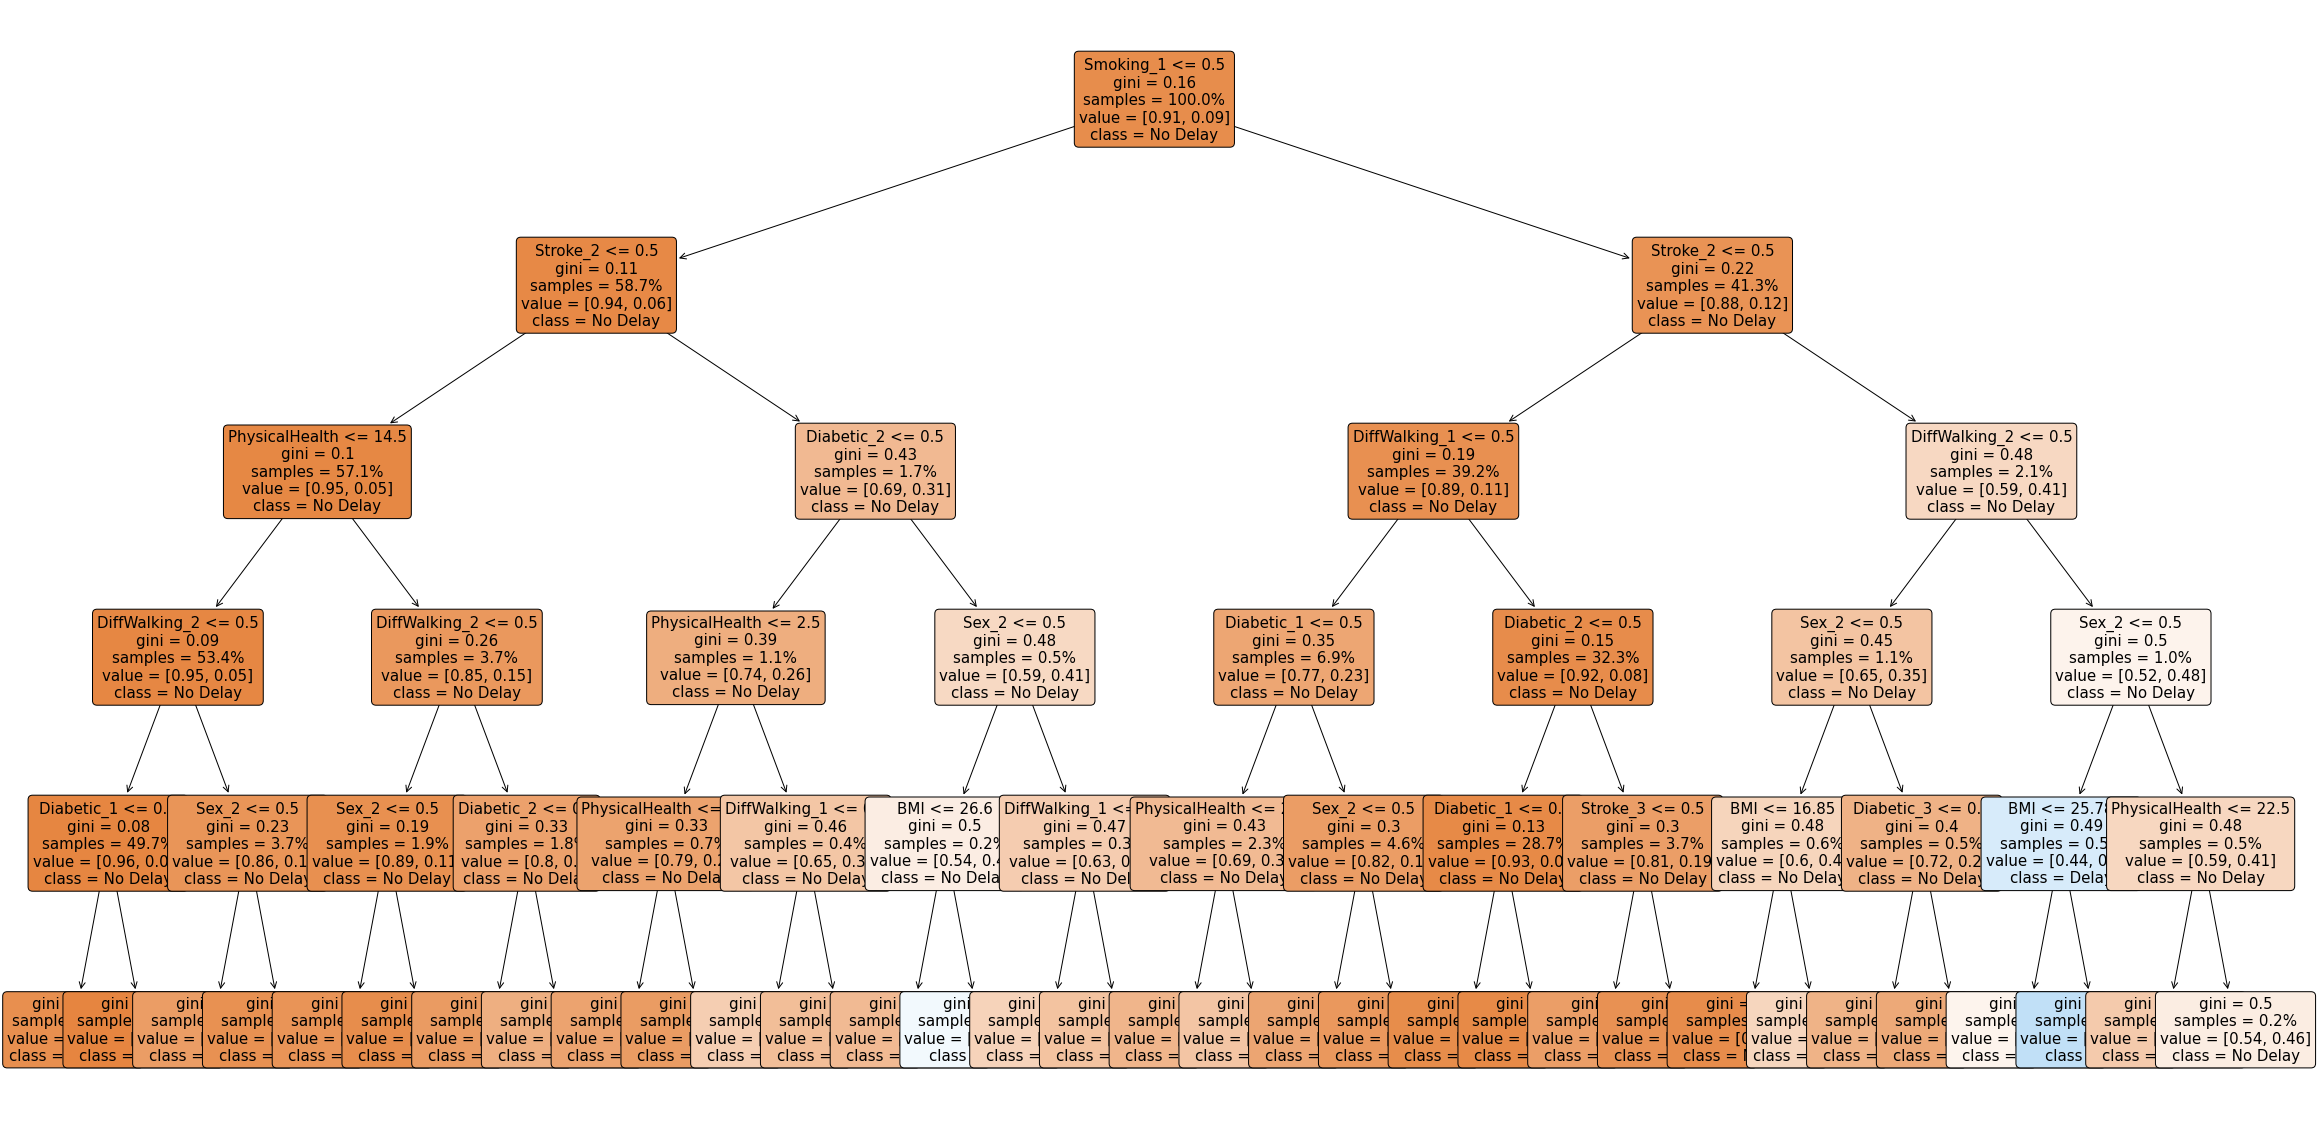

In [207]:
from sklearn import tree


fig, ax = plt.subplots(figsize=(40,20))
tree.plot_tree(tree_list[0], 
               ax = ax, 
               fontsize = 15,
               proportion=True,
               filled = True, 
               impurity=True,
                rounded = True,
               precision = 2,

               class_names = ['No Delay', 'Delay'],
               feature_names = X_test.columns);

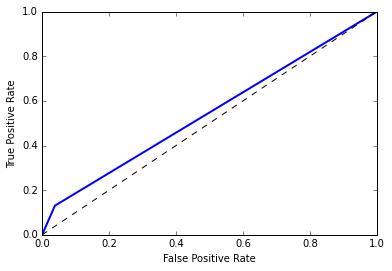

In [208]:

# CURVA ROC: calcula fpr e tpr para vários limiares
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# probabilidades
# probs = clf_RF.predict_proba(X_test)

y_scores = cross_val_predict(clf_RF, X_test, y_test)

# obtem fpr, tpr e limites
fpr, tpr, thresholds = roc_curve(y_test, y_scores)


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")


plot_roc_curve(fpr, tpr)

In [209]:
clf_RF.feature_importances_

array([6.85654176e-01, 5.67927687e-03, 5.57569602e-03, 1.39684909e-02,
       2.67335304e-02, 8.75965542e-04, 1.11885794e-02, 1.95867203e-02,
       1.48473702e-03, 5.75845992e-04, 2.33501001e-02, 2.02673661e-02,
       6.23842176e-03, 5.67590547e-03, 8.79557039e-02, 8.51894846e-02])

In [210]:
# FEATURE IMPORTANCE
feature_imp = pd.Series(clf_RF.feature_importances_, index=X_train.columns).sort_values(
    ascending=False
)
feature_imp

BMI              0.69
SleepTime        0.09
PhysicalHealth   0.09
Stroke_2         0.03
DiffWalking_1    0.02
DiffWalking_2    0.02
Diabetic_2       0.02
Stroke_1         0.01
Diabetic_1       0.01
Sex_1            0.01
Smoking_1        0.01
Sex_2            0.01
Smoking_2        0.01
Diabetic_3       0.00
Stroke_3         0.00
Diabetic_4       0.00
dtype: float64

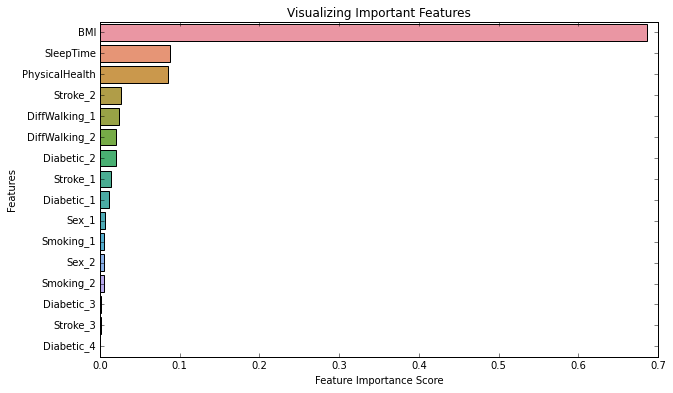

In [211]:
# Creating a bar plot
_ = plt.figure(figsize=(10, 6))
_ = sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
_ = plt.xlabel("Feature Importance Score")
_ = plt.ylabel("Features")
_ = plt.title("Visualizing Important Features")
_ = plt.savefig("rf_features.png")

In [212]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint

# Tunando os hiperparâmetros:
model_params = {
    # randomly sample numbers from 4 to 204 estimators
    "n_estimators": randint(4, 200),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    "max_features": truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    "min_samples_split": uniform(0.01, 0.199),
}

# create random forest classifier model
rf_model = RandomForestClassifier()

# set up random search meta-estimator
# this will train 100 models over 5 folds of cross validation (500 models total)
clf = RandomizedSearchCV(rf_model, model_params, n_iter=10, cv=5, random_state=1)

# train the random search meta-estimator to find the best model out of 100 candidates
model = clf.fit(X_train, y_train)

# print winning set of hyperparameters
from pprint import pprint

pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 0.2864742729236049,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 0.15334457419498948,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 141,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [110]:
# Qual combinação de parâmetros trouxe melhor resultado:
model.best_estimator_

RandomForestClassifier(max_features=0.2864742729236049,
                       min_samples_split=0.15334457419498948, n_estimators=141)

In [173]:
clf_random = RandomForestClassifier(
    max_features=0.2864742729236049,
    min_samples_split=0.15334457419498948,
    n_estimators=141,
)

clf_random.fit(X_train, y_train)

RandomForestClassifier(max_features=0.2864742729236049,
                       min_samples_split=0.15334457419498948, n_estimators=141)

In [174]:
# metricas de avaliacao
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
y_pred_random = clf_random.predict(X_test)

print("Acurácia: " + str(accuracy_score(y_test, y_pred_random)))
print(
    "F1 Score: {}".format(f1_score(y_test, y_pred))
)  # indica poucos falsos positivos e falsos negativos, quanto mais próximo de 1, melhor  

Acurácia: 0.9167970416725928
F1 Score: 0.17421602787456444


In [175]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.174
